In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# python Datenauswertung
#CSV_Datei = "df_eu_2023.csv"
#pathDat =f"{"/files/"}{CSV_Datei}"
fields =["Mt","Ewltp (g/km)", "Ft", "ec (cm3)", "ep (KW)", "z (Wh/km)", "Erwltp (g/km)", "year","Electric range (km)" ]
types = {"Mt": "float64", "Ewltp (g/km)": "float64", "Ft": "object", "ec (cm3)": "float64", "ep (KW)": "float64", "Erwltp (g/km)": "float64",
          "year":"int", "Electric range (km)": "float64" }
df = pd.read_csv("files/CO2_passenger_cars_2023.csv", sep = ",",usecols = fields,  header = 0, dtype=types)
#df = pd.read_csv("files/CO2_passenger_cars_2023.csv", sep = ",",  header = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10734898 entries, 0 to 10734897
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Mt                   float64
 1   Ewltp (g/km)         float64
 2   Ft                   object 
 3   ec (cm3)             float64
 4   ep (KW)              float64
 5   z (Wh/km)            float64
 6   Erwltp (g/km)        float64
 7   year                 int64  
 8   Electric range (km)  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 737.1+ MB


In [4]:
df.head(15)

,Mt,Ewltp (g/km),Ft,ec (cm3),ep (KW),z (Wh/km),Erwltp (g/km),year,Electric range (km)
0,1762.0,203.0,petrol,1984.0,221.0,NaN,1.96,2023,NaN
1,2258.0,0.0,electric,NaN,150.0,176.0,NaN,2023,501.0
2,1852.0,135.0,diesel,1995.0,110.0,NaN,1.84,2023,NaN
3,1447.0,129.0,petrol,999.0,92.0,NaN,2.00,2023,NaN
4,2104.0,176.0,diesel,1968.0,150.0,NaN,1.86,2023,NaN
5,1726.0,166.0,petrol,1984.0,140.0,NaN,1.98,2023,NaN
6,1810.0,29.0,petrol/electric,1395.0,110.0,153.0,NaN,2023,57.0
7,2435.0,193.0,diesel,1950.0,120.0,NaN,1.00,2023,NaN
8,1827.0,0.0,electric,NaN,107.0,179.0,NaN,2023,200.0
9,2763.0,0.0,electric,NaN,250.0,217.0,NaN,2023,455.0


# Neuer Abschnitt

Cleaning data after technical relevance: 
- Unnamed:          is a running number.            	                                                                        to be eliminated
- Identification:   ID Type and brand of vehicle. String, not evaluable                                                         to be eliminated
- MS:               Member State of the EU: string. Doesn't play a role for our target                                          to be eliminated
- Mt:               Wltp testmass, float, important feature                                                                     set as feature
- Ewltp (g/km):     Specific WLTP emission could be target                                                                      set as target
- Ft:               Fueltype, string                                                                                            set as feature, to be dichiotomized
- Fm:               Fuelmode, string, there is no precise description: petrol can be M or H                                     to be eliminatid
- ec: (cm^3)        Engine capacity, quantitative variable, relevant to CO2-emission                                            set as feature
- ep: (KW)          Engine performance, quantitative variable, relevant to CO2-Emission                                         set as feature
- z:  (Wh/km)       relevant for electrical vehicles                                                                            set as feature for electrical vehicles
- z:  (Wh/km)       only relevant for electric vehicles, should be calculate to CO2-emission, equals target                     to be eliminated
- IT:               inovative Technology or group of inovative technology, would require further information                    to be eliminated
- Erwltp (g/km)	    Fuelreduction by inovative technologies, has a direct influence                                             set as feature
- Fuel consumption  in l/100km, second target to be choosen                                                                     set as target, if not CO-emission, can't be loaded
- Electric Range    in km, only relevant for electric car, has indirect influence on CO2-emission over weight                   set as feature for electric cars

In [19]:
df.isna().sum()

Mt                      161527
Ewltp (g/km)             13366
Ft                           0
ec (cm3)               1670030
ep (KW)                  50683
z (Wh/km)              8298363
Erwltp (g/km)          3790286
year                         0
Electric range (km)    8306433
dtype: int64

In [20]:
df.describe()

,Mt,Ewltp (g/km),ec (cm3),ep (KW),z (Wh/km),Erwltp (g/km),year,Electric range (km)
count,1.057337e+07,1.072153e+07,9.064868e+06,1.068422e+07,2.436535e+06,6.944612e+06,10734898.0,2.428465e+06
mean,1.658169e+03,1.065199e+02,1.545022e+03,1.152157e+02,1.720280e+02,1.511407e+00,2023.0,3.126688e+02
std,3.768652e+02,5.962395e+01,5.281390e+02,6.291614e+01,2.847060e+01,5.086313e-01,0.0,1.932649e+02
min,6.150000e+02,0.000000e+00,6.580000e+02,8.000000e+00,1.200000e+01,5.000000e-01,2023.0,1.200000e+01
25%,1.375000e+03,1.000000e+02,1.197000e+03,7.400000e+01,1.550000e+02,1.080000e+00,2023.0,7.500000e+01
50%,1.585000e+03,1.230000e+02,1.497000e+03,1.000000e+02,1.660000e+02,1.700000e+00,2023.0,3.620000e+02
75%,1.890000e+03,1.390000e+02,1.968000e+03,1.320000e+02,1.790000e+02,1.960000e+00,2023.0,4.870000e+02
max,4.574000e+03,5.720000e+02,7.997000e+03,1.177000e+03,6.000000e+02,3.000000e+00,2023.0,8.830000e+02


In [26]:
df.shape  #  (Zeilen, Spalten)


(6930976, 9)

In [5]:
# cleaning data of NaNs
df = df.dropna(subset = ["Mt", "Ewltp (g/km)", "ec (cm3)", "ep (KW)", "Erwltp (g/km)"])
df.isna().sum()

Mt                           0
Ewltp (g/km)                 0
Ft                           0
ec (cm3)                     0
ep (KW)                      0
z (Wh/km)              6930966
Erwltp (g/km)                0
year                         0
Electric range (km)    6930965
dtype: int64

Text(0.5, 1.0, 'Scatterplot')

c:\Users\user\Documents\GitRepositories\JAN25_BDS_INT_CO2\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\user\Documents\GitRepositories\JAN25_BDS_INT_CO2\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


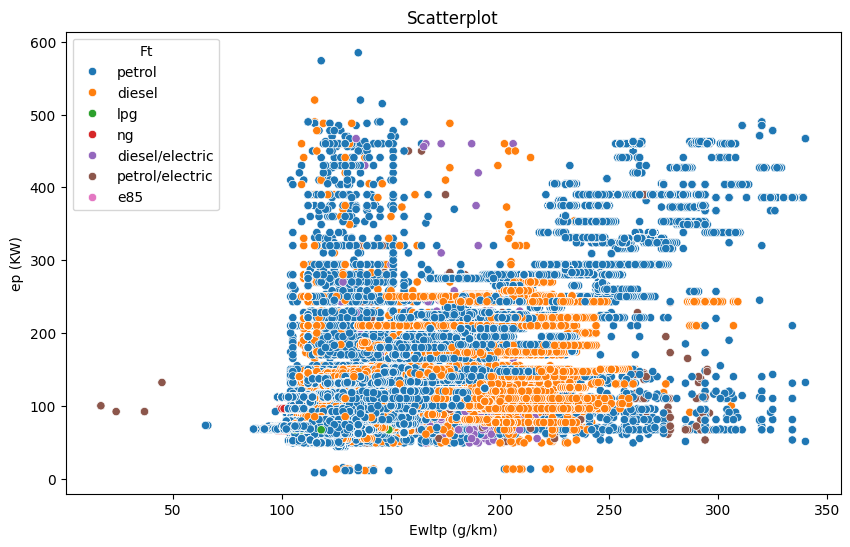

In [48]:
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(x="Ewltp (g/km)", y="ep (KW)",hue = "Ft", data=df)
plt.title("Scatterplot")

Text(0, 0.5, 'Frequency in percent')

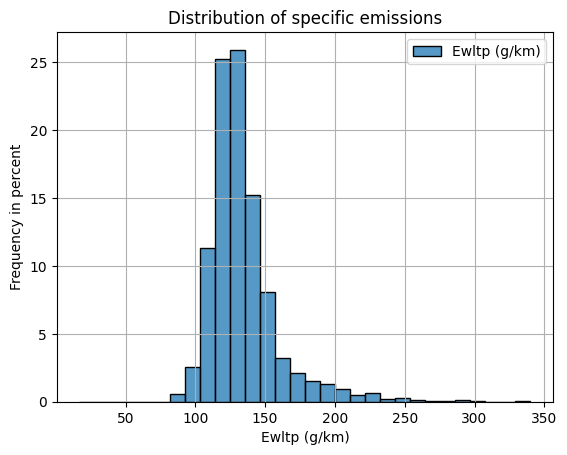

In [50]:
# Distribution of specific emissions
sns.histplot(df["Ewltp (g/km)"], bins=30, stat="percent", label="Ewltp (g/km)")
plt.legend()
plt.title("Distribution of specific emissions")
plt.grid(True)
plt.xlabel("Ewltp (g/km)")
plt.ylabel("Frequency in percent") 

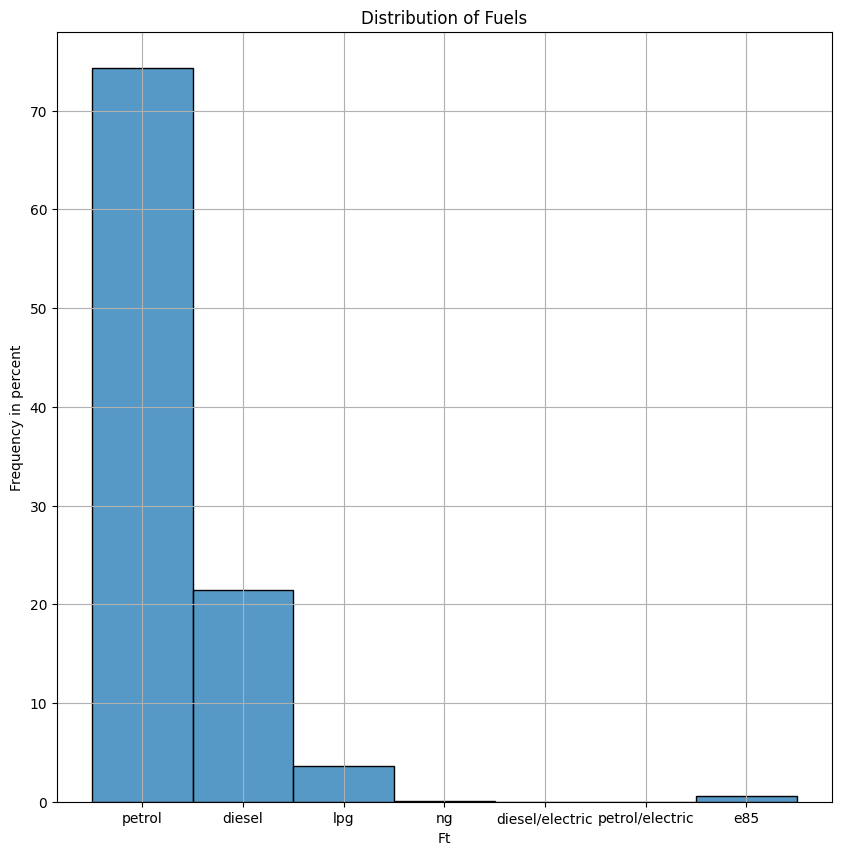

In [51]:
#Distribution of Fuels
fig = plt.figure(figsize=(10, 10))
sns.histplot(df["Ft"], stat= "percent", label="Fuel")
plt.title("Distribution of Fuels")
plt.ylabel("Frequency in percent")
plt.grid(True)

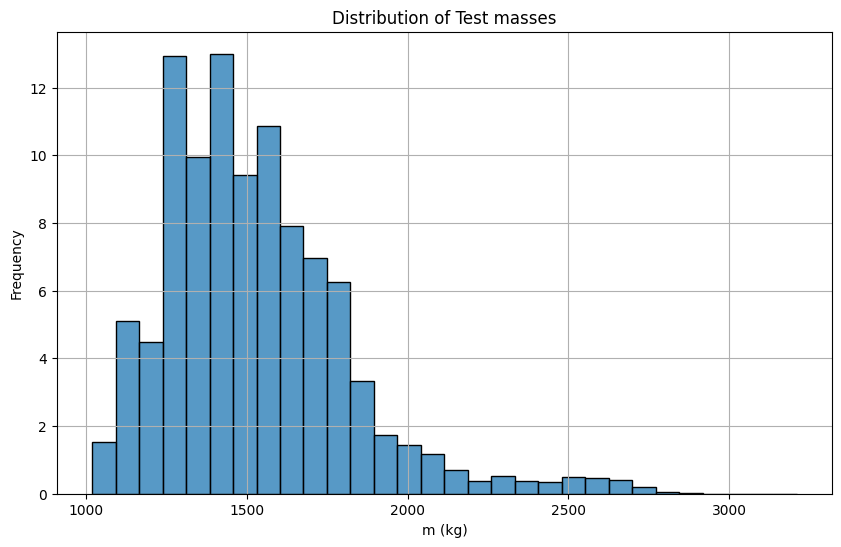

In [52]:
# Distribution of Test masses
fig = plt.figure(figsize=(10, 6))
sns.histplot(df["Mt"], bins=30, stat= "percent", label="m (kg)")
plt.xlabel("m (kg)")
plt.ylabel("Frequency")
plt.title("Distribution of Test masses")  
plt.grid(True)  

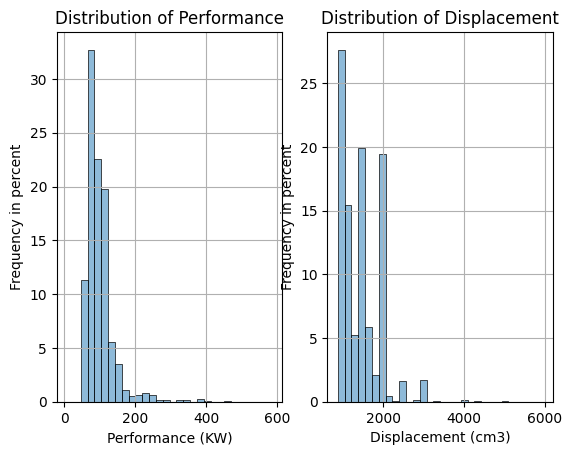

In [30]:
#Disttribution of Performance
plt.subplot(1, 2, 1)
sns.histplot(df["ep (KW)"], bins=30,stat="percent", alpha=0.5, label="Performance")
plt.xlabel("Performance (KW)")
plt.ylabel("Frequency in percent")
plt.title("Distribution of Performance")
plt.grid(True)
# Distribution of Displacement
plt.subplot(1, 2, 2)
sns.histplot(df["ec (cm3)"], bins=30,stat="percent", alpha=0.5, label="displacement")
plt.xlabel("Displacement (cm3)")
plt.ylabel("Frequency in percent") 
plt.title("Distribution of Displacement")
plt.grid(True)

Text(0.5, 1.0, 'Distribution of Registrations')

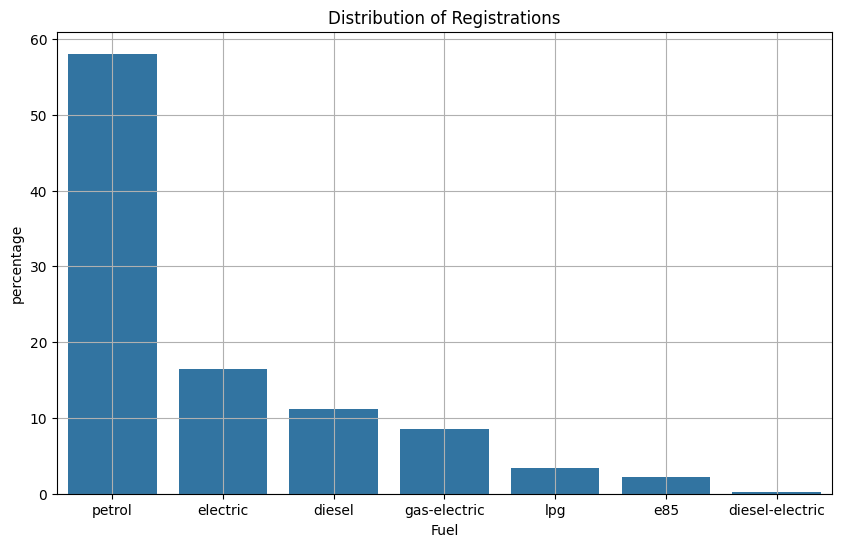

In [24]:
Registration ={ "petrol": 1090719,"electric": 309394, "diesel": 209535, "gas-electric":  160367, "lpg": 63536, "e85": 40887, "diesel-electric": 4462}
df = pd.DataFrame(Registration.items(), columns=["Fuel", "Registration"])

#Distribution of Registrations
fig = plt.figure(figsize=(10, 6))
df["percentage"] = df["Registration"]/df["Registration"].sum()*100
sns.barplot(x="Fuel", y="percentage", data=df)
plt.grid(True)
plt.title("Distribution of Registrations")

In [6]:

# Dividing according to Fueltype into electric and non electric
df_pe = df[df["Ft"]!= "electric"]
df_el = df[df["Ft"]== "electric"]

#Dichitomizing Fueltypes
df_pe = pd.get_dummies(df, columns = ["Ft"], dtype = "int")

df_pe = df_pe.drop(columns= ["z (Wh/km)", "year",	"Electric range (km)" ])
X = df_pe.drop(columns=["Ewltp (g/km)"])
y = df_pe["Ewltp (g/km)"]

X.isna().sum()

Mt                    0
ec (cm3)              0
ep (KW)               0
Erwltp (g/km)         0
Ft_diesel             0
Ft_diesel/electric    0
Ft_e85                0
Ft_lpg                0
Ft_ng                 0
Ft_petrol             0
Ft_petrol/electric    0
dtype: int64

<Axes: >

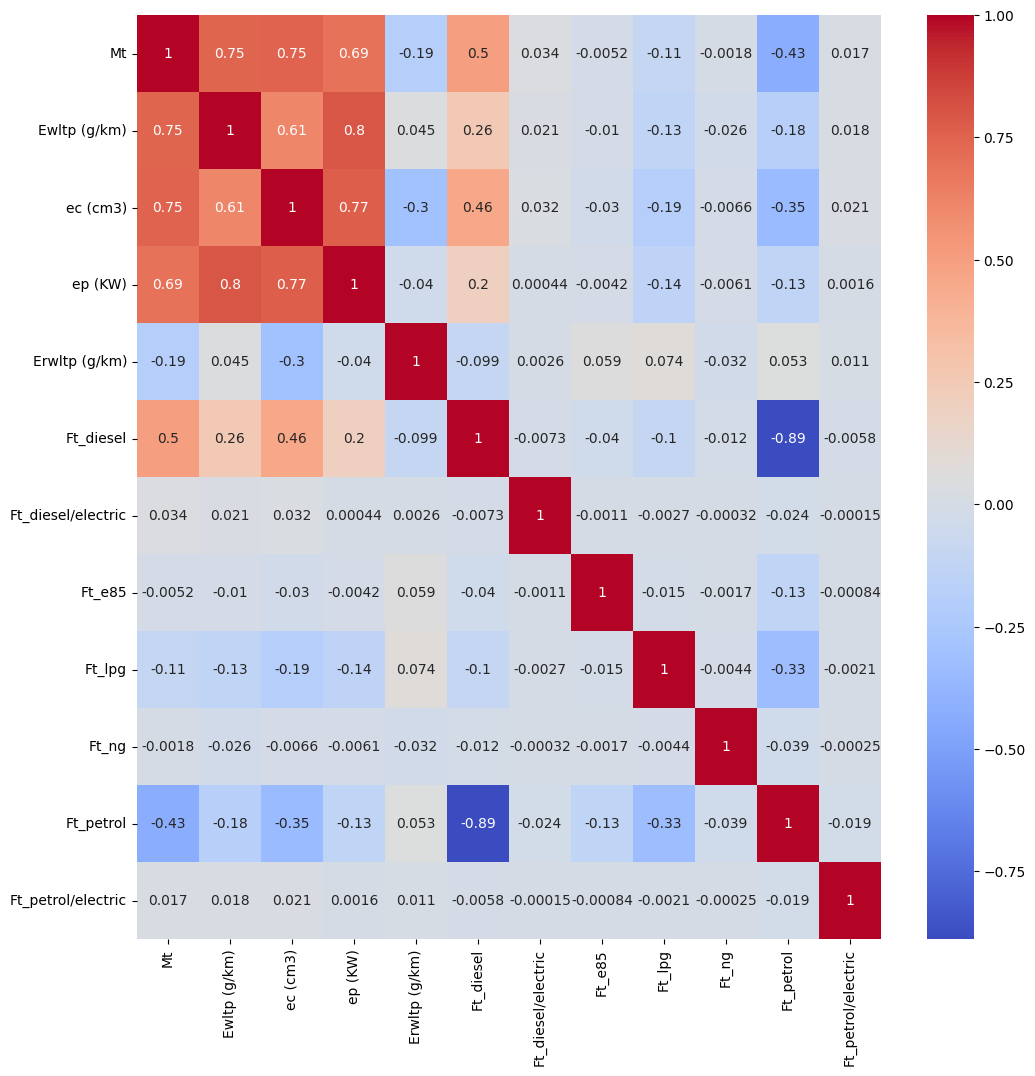

In [57]:
corr = df_pe.corr()
fig, ax =plt.subplots(figsize =(12,12))
sns.heatmap(corr, annot=True, ax =ax, cmap="coolwarm")

In [7]:
# Trying out LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Testing LinearRegression for predicting the CO2-emission   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)

#score of LinearRegression
score_train = lr.score(X_train, y_train)
score_test = lr.score(X_test, y_test)
print("score_train:",score_train)
print("score_test:",score_test)

# mean squared Error
y_pred_tr = lr.predict(X_train)
y_pred_te = lr.predict(X_test)
mse_tr = mean_squared_error(y_pred_tr, y_train )
mse_te = mean_squared_error(y_pred_te, y_test)
print("mse training data: ", mse_tr)
print("mse test data: ", mse_te)


score_train: 0.7397104909105441
score_test: 0.7400946169098901
mse training data:  166.1599721416023
mse test data:  165.83025382967816


In [ ]:
#trying out RidgeCV
from sklearn.linear_model import RidgeCV
ridge_reg = RidgeCV(alphas =[0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100])
ridge_reg.fit(X_train, y_train)
print("alpha used:",ridge_reg.alpha_)
sc_train = ridge_reg.score(X_train, y_train)
sc_test = ridge_reg.score(X_test, y_test)
print("score: ", sc_test)
print("score: ", sc_train)

# mean squared Error
y_pred_tr = ridge_reg.predict(X_train)
y_pred_te = ridge_reg.predict(X_test)
mse_tr = mean_squared_error(y_pred_tr, y_train )
mse_te = mean_squared_error(y_pred_te, y_test)
print("mse training data: ", mse_tr)
print("mse test data: ", mse_te)


alpha used: 1.0
score:  0.6837296063684393
score:  0.6829946540722237
mse training data:  202.36543390611854
mse test data:  201.79343356097536


In [ ]:
#trying out lasso  regression
from sklearn.linear_model import LassoCV
lasso_r = LassoCV()
lasso_r.fit(X_train, y_train)
#lasso coefficients:
print(lasso_r.coef_)
print("alpha used: ", lasso_r.alpha_)

#scores
sc_train = lasso_r.score(X_train, y_train)
sc_test = lasso_r.score(X_test, y_test)
print("score: ", sc_test)
print("score: ", sc_train)

# mean squared Error
y_pred_tr = lasso_r.predict(X_train)
y_pred_te = lasso_r.predict(X_test)
mse_tr = mean_squared_error(y_pred_tr, y_train )
mse_te = mean_squared_error(y_pred_te, y_test)
print("mse training data: ", mse_tr)
print("mse test data: ", mse_te)

feats = list(X_train.columns)
coeffs = list(lasso_r.coef_)
df=pd.DataFrame({'alphas': coeffs}, index=feats)
df

[ 0.04313969 -0.01379949  0.39707998  0.         -0.          0.
 -0.         -0.         -0.          0.          0.        ]
alpha used:  7.17480685391903
score:  0.7277926015773878
score:  0.7275204663653451
mse training data:  173.94166932148985
mse test data:  173.67944225721513


,alphas
Mt,0.043140
ec (cm3),-0.013799
ep (KW),0.397080
Erwltp (g/km),0.000000
Ft_diesel,-0.000000
Ft_diesel/electric,0.000000
Ft_e85,-0.000000
Ft_lpg,-0.000000
Ft_ng,-0.000000
Ft_petrol,0.000000


In [17]:
# trying out ElasticNetCV
from sklearn.linear_model import ElasticNetCV
model_en = ElasticNetCV(cv = 8, l1_ratio =(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99),
                        alphas =(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0))
model_en.fit(X_train, y_train)

# intercept and coefficients for each variable
coeffs = list(model_en.coef_)
coeffs.insert(0, model_en.intercept_)
feats = list(X.columns)
feats.insert(0, 'intercept')

df = pd.DataFrame({"coefficients": coeffs}, index=feats)
print(df)

#scores
sc_train = model_en.score(X_train, y_train)
sc_test = model_en.score(X_test, y_test)
print("score: ", sc_test)
print("score: ", sc_train)

# mean squared Error
y_pred_tr = model_en.predict(X_train)
y_pred_te = model_en.predict(X_test)
mse_tr = mean_squared_error(y_pred_tr, y_train )
mse_te = mean_squared_error(y_pred_te, y_test)
print("mse training data: ", mse_tr)
print("mse test data: ", mse_te)



                    coefficients
intercept              36.173212
Mt                      0.045013
ec (cm3)               -0.010888
ep (KW)                 0.368810
Erwltp (g/km)           5.394847
Ft_diesel              -0.000000
Ft_diesel/electric     11.804684
Ft_e85                 -4.657708
Ft_lpg                 -4.428082
Ft_ng                 -17.583878
Ft_petrol               1.594596
Ft_petrol/electric     17.007366
score:  0.7400623579344576
score:  0.7396787435441372
mse training data:  166.18023858083072
mse test data:  165.85083637406666
